### Importing libraries

In [ ]:
!pip install mplfinance

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from scipy import stats
pd.options.display.float_format = '{:.3f}'.format
import mplfinance as mpf
from scipy.stats import norm

### Data loading

In [3]:
files = {
    "NKE": "data/NKE_stock_data.csv",
    "GS": "data/GS_stock_data.csv",
    "JNJ": "data/JNJ_stock_data.csv",
    "PFE": "data/PFE_stock_data.csv",
    "JPM": "data/JPM_stock_data.csv",
}

dfs = {}

for ticker, path in files.items():
    df = pd.read_csv(path, parse_dates=["Date"])
    df = df.sort_values("Date").set_index("Date")
    dfs[ticker] = df
    
dfs["NKE"].tail()

,Close,High,Low,Open,Volume,H-L,O-C,7_DAY_MA,14_DAY_MA,21_DAY_MA,7_DAY_STD
Date,,,,,,,,,,,
2019-03-29,77.062,77.648,76.742,77.419,6492000,0.906,-0.357,76.772,78.078,78.166,1.804
2019-04-01,77.996,78.078,77.511,77.822,6737400,0.567,0.174,76.409,78.065,78.082,0.992
2019-04-02,77.209,78.023,77.017,77.785,4433800,1.007,-0.577,76.694,77.963,78.026,0.871
2019-04-03,77.300,77.776,77.099,77.694,4080900,0.677,-0.394,76.973,77.806,77.984,0.651
2019-04-04,78.041,78.133,77.200,77.319,3660700,0.933,0.723,77.222,77.707,77.991,0.684


### Initial data exploration

In [4]:
dfs['NKE'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2009-04-06 to 2019-04-04
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Open       2517 non-null   float64
 4   Volume     2517 non-null   int64  
 5   H-L        2517 non-null   float64
 6   O-C        2517 non-null   float64
 7   7_DAY_MA   2511 non-null   float64
 8   14_DAY_MA  2504 non-null   float64
 9   21_DAY_MA  2497 non-null   float64
 10  7_DAY_STD  2511 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 236.0 KB


In [5]:
dfs['NKE'].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2517.000,35.929,18.575,9.921,18.970,33.104,50.116,80.540
High,2517.000,36.236,18.737,10.094,19.158,33.303,50.373,81.071
Low,2517.000,35.605,18.416,9.769,18.749,32.903,49.603,79.881
Open,2517.000,35.915,18.578,9.897,18.889,33.101,49.985,80.732
Volume,2517.000,9563493.603,5652533.641,2302000.000,6357000.000,8239600.000,10980800.000,86339600.000
H-L,2517.000,0.631,0.490,0.101,0.307,0.485,0.798,5.640
O-C,2517.000,0.014,0.477,-4.296,-0.187,0.012,0.214,3.934
7_DAY_MA,2511.000,35.910,18.510,10.164,19.030,33.142,49.981,79.721
14_DAY_MA,2504.000,35.888,18.439,10.384,19.012,33.129,49.958,78.918
21_DAY_MA,2497.000,35.863,18.364,10.424,18.943,33.067,49.917,78.646


### Missing values

In [6]:
missing_summary = pd.concat(
    {ticker: df.isnull().sum() for ticker, df in dfs.items()},
    axis=1
)

missing_summary

,NKE,GS,JNJ,PFE,JPM
Close,0,0,0,0,0
High,0,0,0,0,0
Low,0,0,0,0,0
Open,0,0,0,0,0
Volume,0,0,0,0,0
H-L,0,0,0,0,0
O-C,0,0,0,0,0
7_DAY_MA,6,6,6,6,6
14_DAY_MA,13,13,13,13,13
21_DAY_MA,20,20,20,20,20


### Closing prices over time

In [7]:
close_prices = pd.concat(
    {t: df["Close"] for t, df in dfs.items()},
    axis=1
)
normalized_prices = close_prices / close_prices.iloc[0] * 100
normalized_prices


,NKE,GS,JNJ,PFE,JPM
Date,,,,,
2009-04-06,100.000,100.000,100.000,100.000,100.000
2009-04-07,97.250,99.511,98.391,98.541,96.631
2009-04-08,97.991,98.371,98.563,98.322,97.270
2009-04-09,103.901,106.584,98.487,98.833,116.135
2009-04-13,103.608,111.573,97.988,98.322,119.504
...,...,...,...,...,...
2019-03-29,750.209,187.286,363.256,449.072,448.079
2019-04-01,759.296,191.919,361.151,452.984,463.173
2019-04-02,751.635,192.661,357.850,453.724,465.386


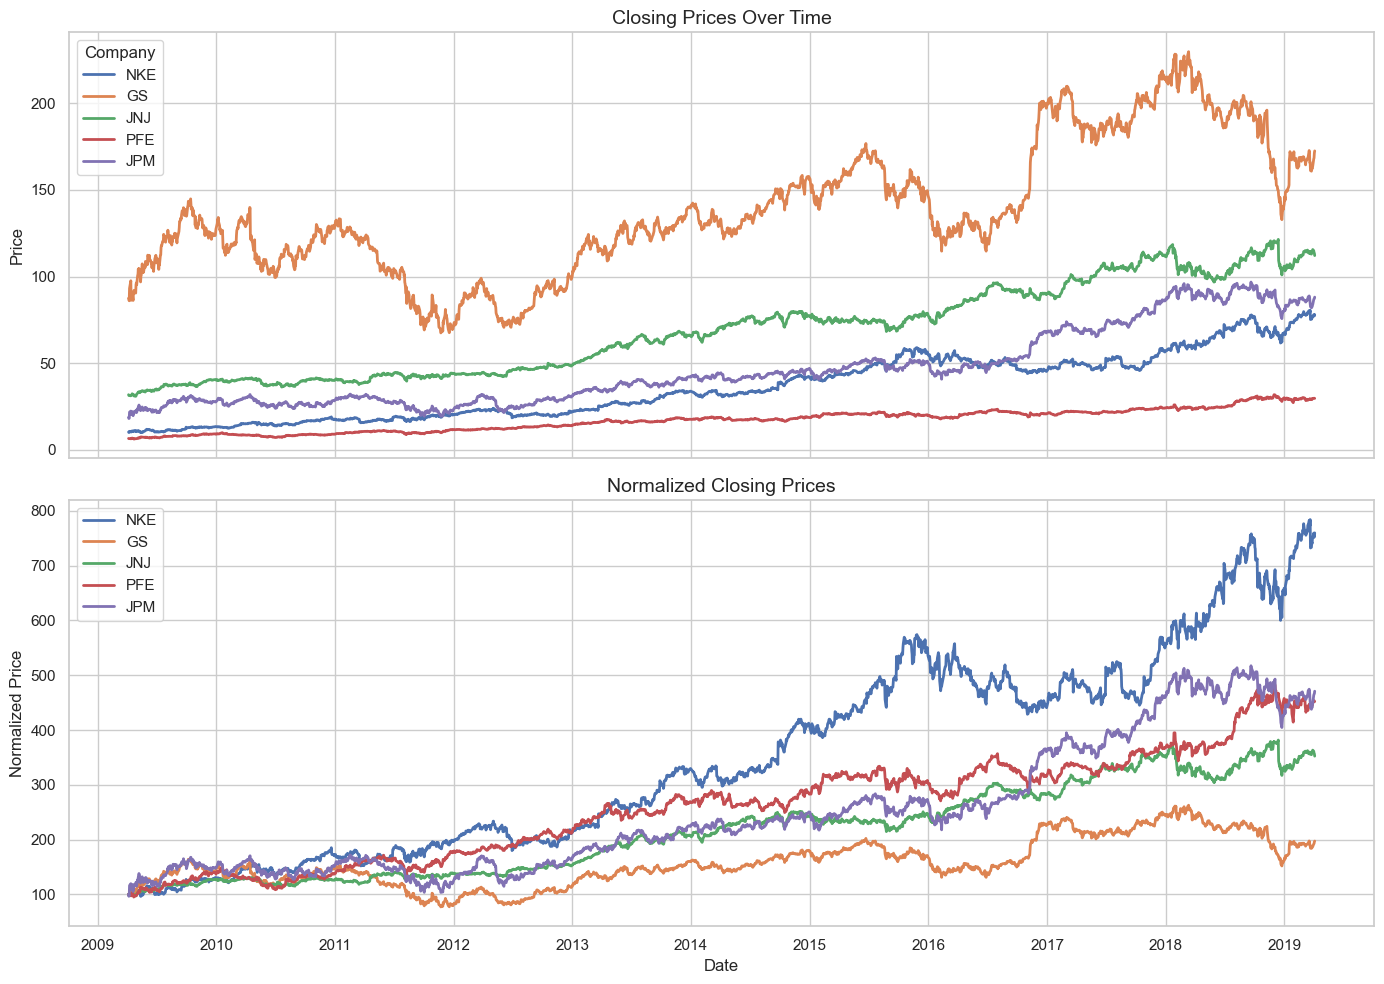

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Close prices
for ticker in close_prices.columns:
    sns.lineplot(
        data=close_prices,
        x=close_prices.index,
        y=ticker,
        ax=axes[0],
        label=ticker,
        linewidth=2
    )

axes[0].set_title("Closing Prices Over Time", fontsize=14)
axes[0].set_ylabel("Price")
axes[0].legend(title="Company")

# Normalized prices
for ticker in normalized_prices.columns:
    sns.lineplot(
        data=normalized_prices,
        x=normalized_prices.index,
        y=ticker,
        ax=axes[1],
        label=ticker,
        linewidth=2
    )

axes[1].set_title("Normalized Closing Prices", fontsize=14)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Normalized Price")

plt.tight_layout()
plt.show()

*Nominal price levels differ substantially across companies, making direct performance comparison difficult. Normalized prices allow for a clear assessment of relative growth, highlighting the strong long-term performance of NKE and JPM. The plot also reveals periods of drawdowns and heightened volatility during market-wide disturbances.*


### Data distribution – comparison with a normal distribution

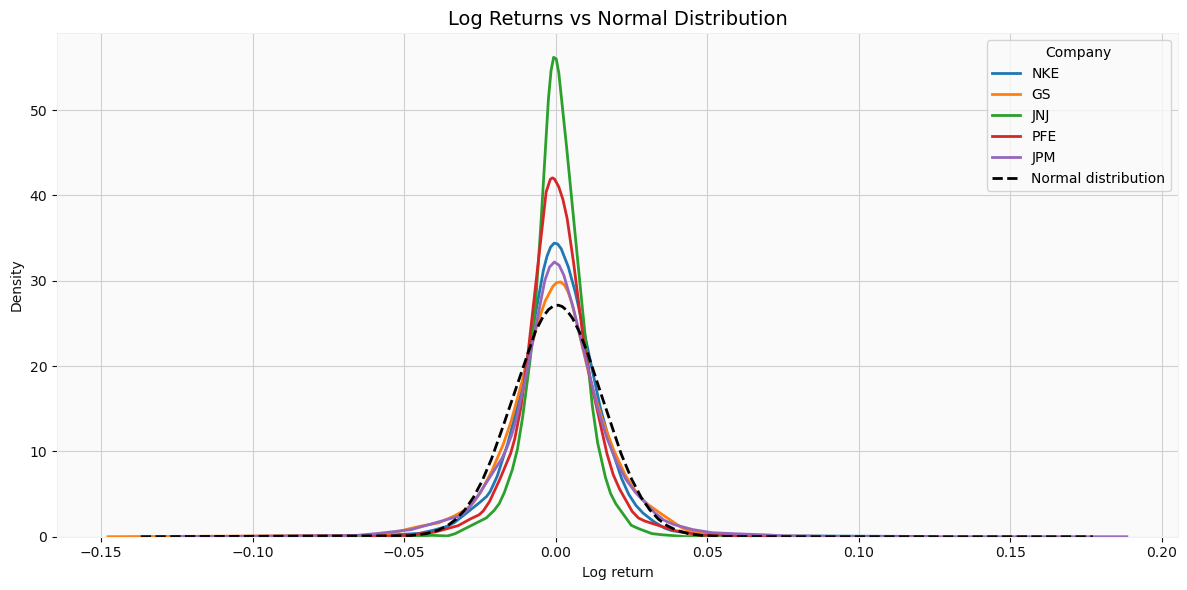

In [26]:
log_returns = np.log(close_prices).diff().dropna()


plt.figure(figsize=(12, 6))

for ticker in log_returns.columns:
    sns.kdeplot(
        log_returns[ticker],
        linewidth=2,
        label=ticker
    )

all_returns = log_returns.values.flatten()
mu, sigma = np.mean(all_returns), np.std(all_returns)

x = np.linspace(all_returns.min(), all_returns.max(), 1000)
normal_pdf = norm.pdf(x, mu, sigma)

plt.plot(
    x,
    normal_pdf,
    linestyle="--",
    color="black",
    linewidth=2,
    label="Normal distribution"
)

plt.title("Log Returns vs Normal Distribution", fontsize=14)
plt.xlabel("Log return")
plt.ylabel("Density")
plt.legend(title="Company")
plt.tight_layout()
plt.show()

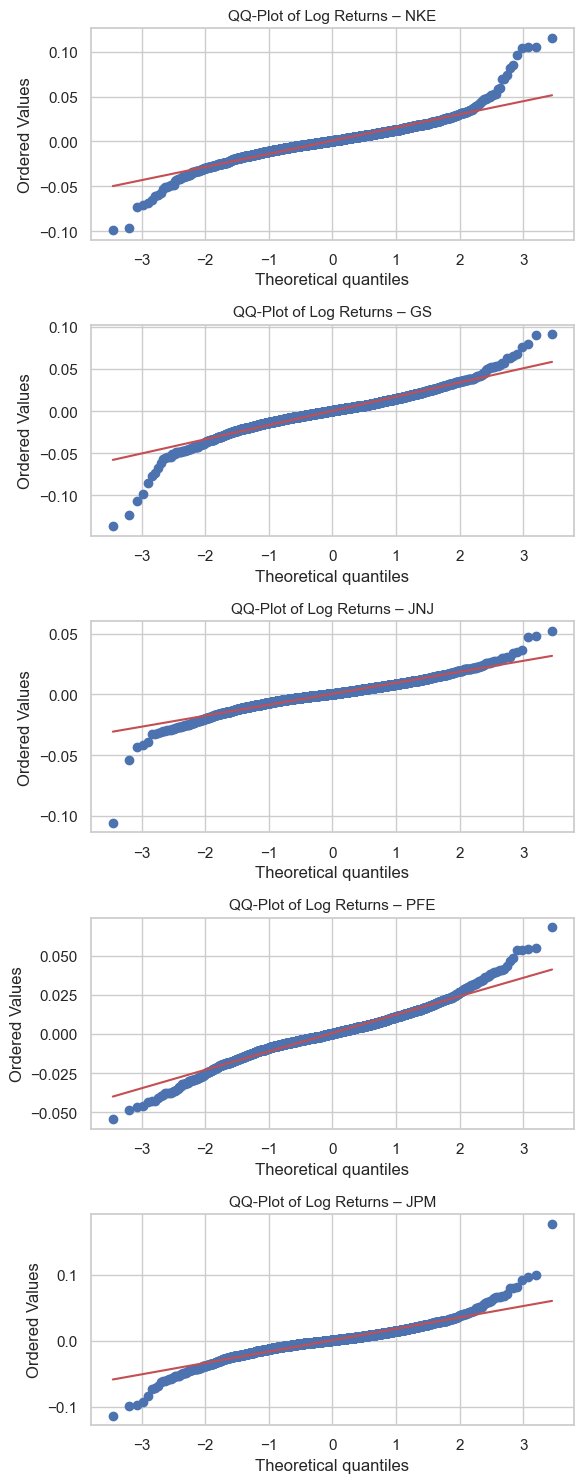

In [10]:
tickers = log_returns.columns
n = len(tickers)

fig, axes = plt.subplots(n, 1, figsize=(6, 3 * n))

for i, ticker in enumerate(tickers):
    stats.probplot(
        log_returns[ticker].dropna(),
        dist="norm",
        plot=axes[i]
    )
    axes[i].set_title(f"QQ-Plot of Log Returns – {ticker}", fontsize=11)

plt.tight_layout()
plt.show()

*The return distributions are not perfectly normal. Most price changes are small and close to zero, but from time to time large jumps occur. These extreme movements happen more often than would be expected under a normal distribution. This type of distribution is referred to as leptokurtic and implies a higher probability of extreme price movements.*

### Kurtosis and Skewness

In [11]:
skewness = log_returns.skew()
kurtosis = log_returns.kurtosis()  # excess kurtosis (0 = normal)

summary_moments = pd.DataFrame({
    "Skewness": skewness,
    "Excess Kurtosis": kurtosis
})

summary_moments

,Skewness,Excess Kurtosis
NKE,0.429,7.825
GS,-0.461,5.378
JNJ,-0.722,9.108
PFE,0.127,2.446
JPM,0.288,7.884


C:\Users\lampa\AppData\Local\Temp\ipykernel_25584\2859743145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values,palette="Set2")


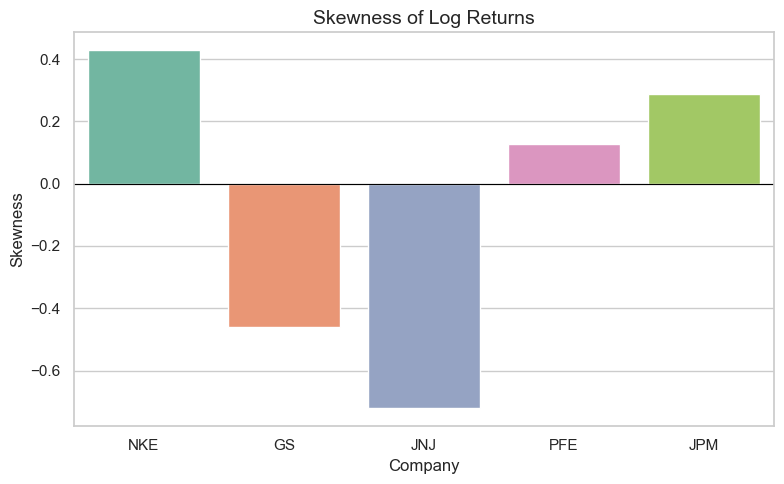

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=skewness.index, y=skewness.values,palette="Set2")

plt.axhline(0, color="black", linewidth=0.8)
plt.title("Skewness of Log Returns", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Skewness")
plt.tight_layout()
plt.show()

C:\Users\lampa\AppData\Local\Temp\ipykernel_25584\2445134919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis.index, y=kurtosis.values,palette="Set2")


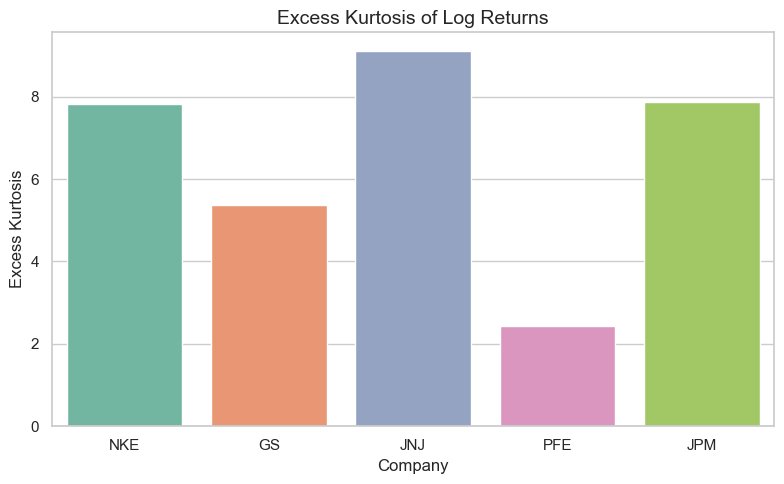

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=kurtosis.index, y=kurtosis.values,palette="Set2")

plt.axhline(0, color="black", linewidth=0.8)
plt.title("Excess Kurtosis of Log Returns", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Excess Kurtosis")
plt.tight_layout()
plt.show()

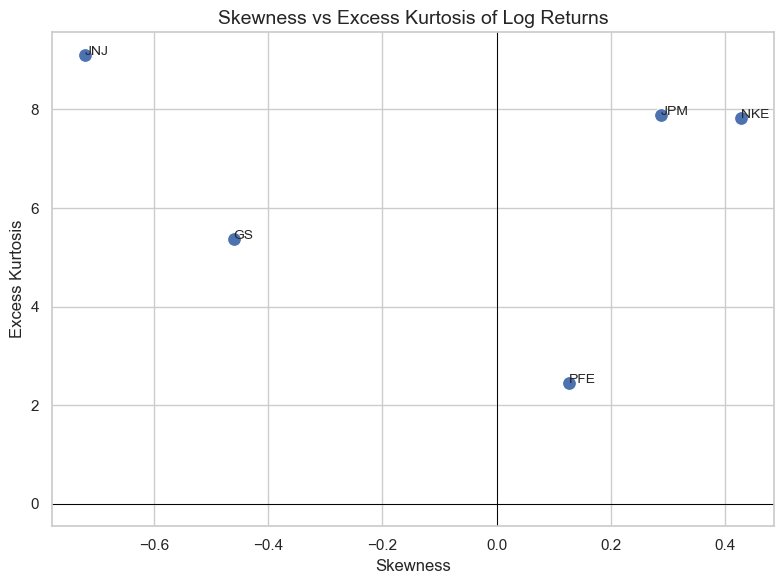

In [14]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=skewness,
    y=kurtosis,
    s=100
)

for t in skewness.index:
    plt.text(skewness[t], kurtosis[t], t, fontsize=10)

plt.axhline(0, color="black", linewidth=0.7)
plt.axvline(0, color="black", linewidth=0.7)
plt.title("Skewness vs Excess Kurtosis of Log Returns", fontsize=14)
plt.xlabel("Skewness")
plt.ylabel("Excess Kurtosis")
plt.tight_layout()
plt.show()

*All analyzed stocks exhibit positive excess kurtosis, indicating leptokurtic return distributions with frequent extreme values. Skewness shows that the distributions are asymmetric: NKE, JPM, and PFE are slightly right-skewed, while GS and JNJ are left-skewed. The highest tail risk is observed for JNJ, NKE, and JPM.*

### Logarithmic returns over time

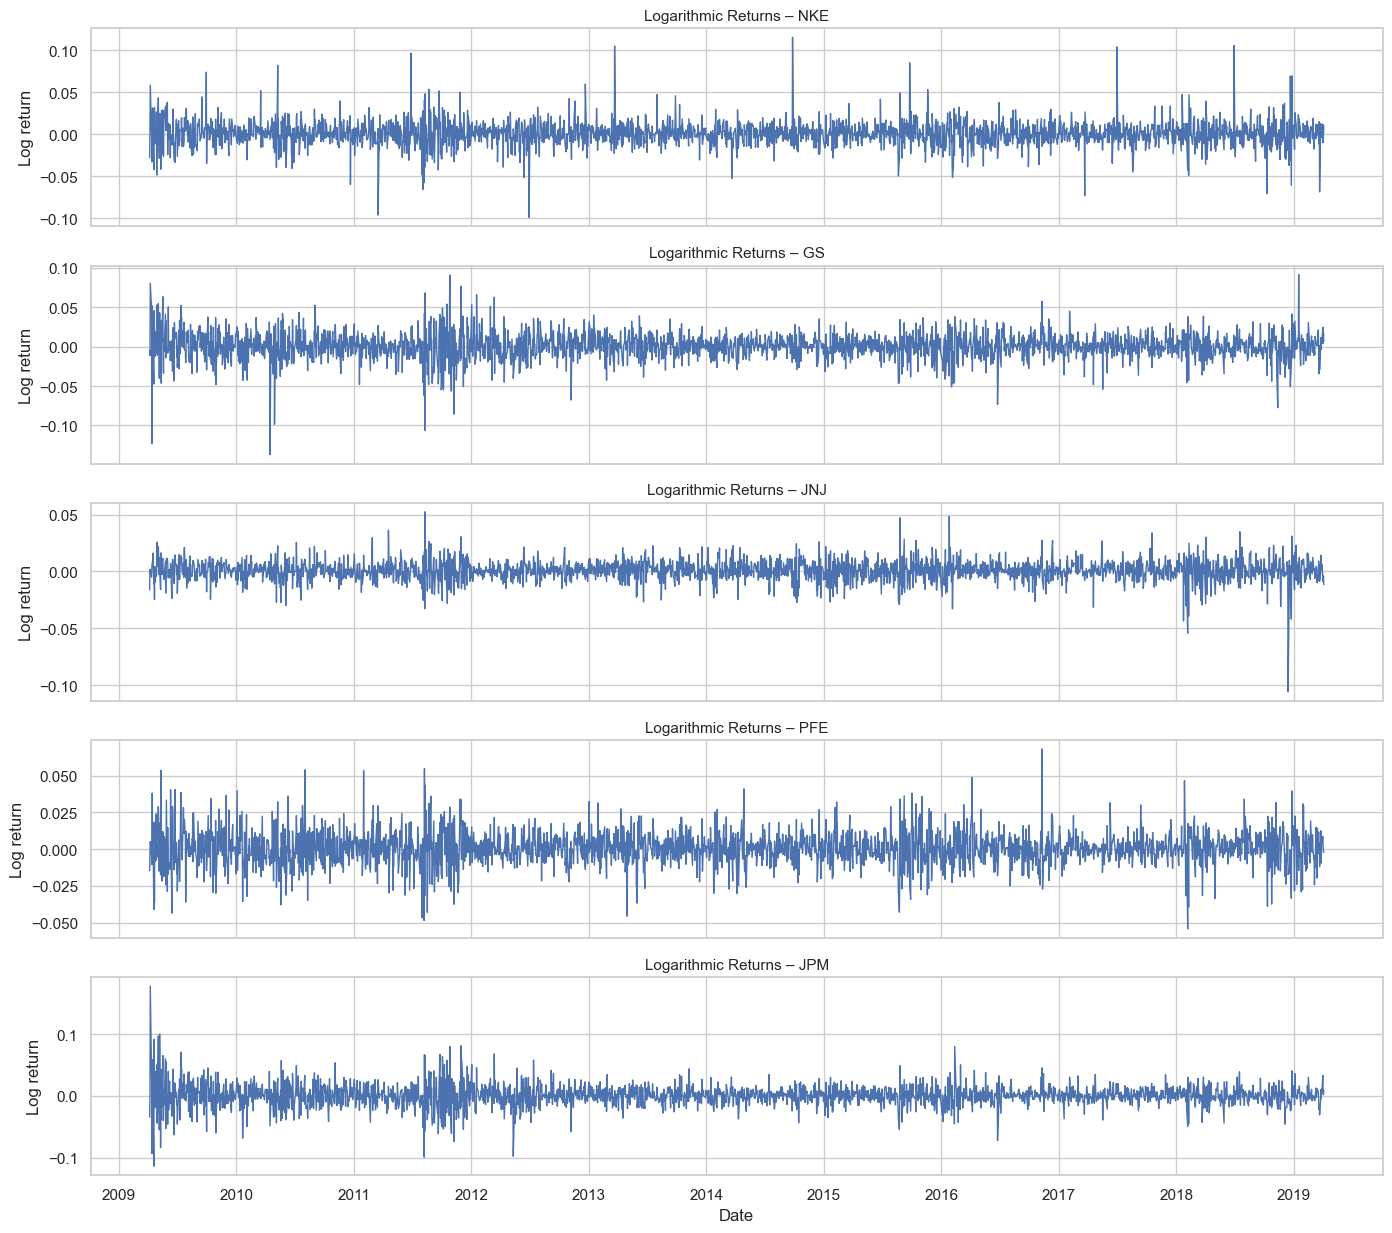

In [15]:
tickers = log_returns.columns
n = len(tickers)

fig, axes = plt.subplots(n, 1, figsize=(14, 2.5 * n), sharex=True)

for i, ticker in enumerate(tickers):
    sns.lineplot(
        data=log_returns,
        x=log_returns.index,
        y=ticker,
        ax=axes[i],
        linewidth=1
    )
    
    axes[i].set_title(f"Logarithmic Returns – {ticker}", fontsize=11)
    axes[i].set_ylabel("Log return")

axes[-1].set_xlabel("Date")

plt.tight_layout()
plt.show()

*Logarithmic returns fluctuate around zero, which is typical for financial time series and indicates no persistent trend in returns themselves. Periods of increased volatility are clearly visible, with clusters of large positive and negative values. This pattern suggests volatility clustering, where calm and turbulent market periods alternate over time.*

### Outliers

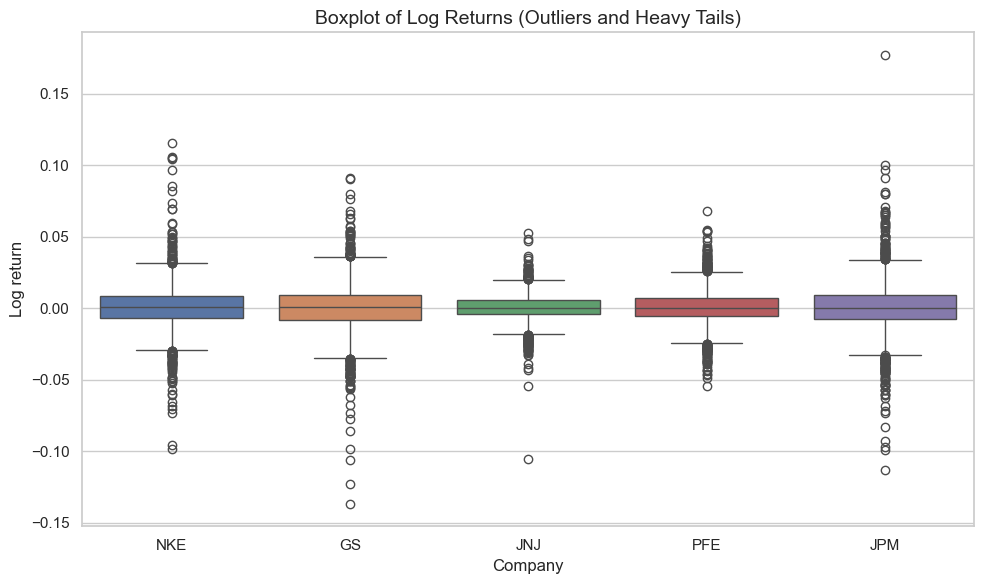

In [16]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=log_returns,
    orient="v",
    showfliers=True
)

plt.title("Boxplot of Log Returns (Outliers and Heavy Tails)", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Log return")
plt.tight_layout()
plt.show()

In [17]:
def outliers_iqr_stats(series):
    series = series.dropna()
    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower) | (series > upper)]
    
    count = len(outliers)
    total = len(series)
    pct = 100 * count / total if total > 0 else 0
    
    return count, pct

rows = []

for ticker in log_returns.columns:
    count, pct = outliers_iqr_stats(log_returns[ticker])
    rows.append({
        "Company": ticker,
        "Outliers (count)": count,
        "Outliers (%)": round(pct, 2),
        "Total observations": log_returns[ticker].dropna().shape[0]
    })

outliers_table = pd.DataFrame(rows).set_index("Company")
outliers_table

,Outliers (count),Outliers (%),Total observations
Company,,,
NKE,110,4.370,2516
GS,116,4.610,2516
JNJ,121,4.810,2516
PFE,123,4.890,2516
JPM,155,6.160,2516


*For all companies, outliers account for a few percent of the total observations, confirming the presence of heavy tails in return distributions. JPM exhibits the highest proportion of outliers, indicating more frequent extreme price movements. These outliers reflect genuine market events rather than data errors.*

### Volatility over time – 7-day rolling standard deviation

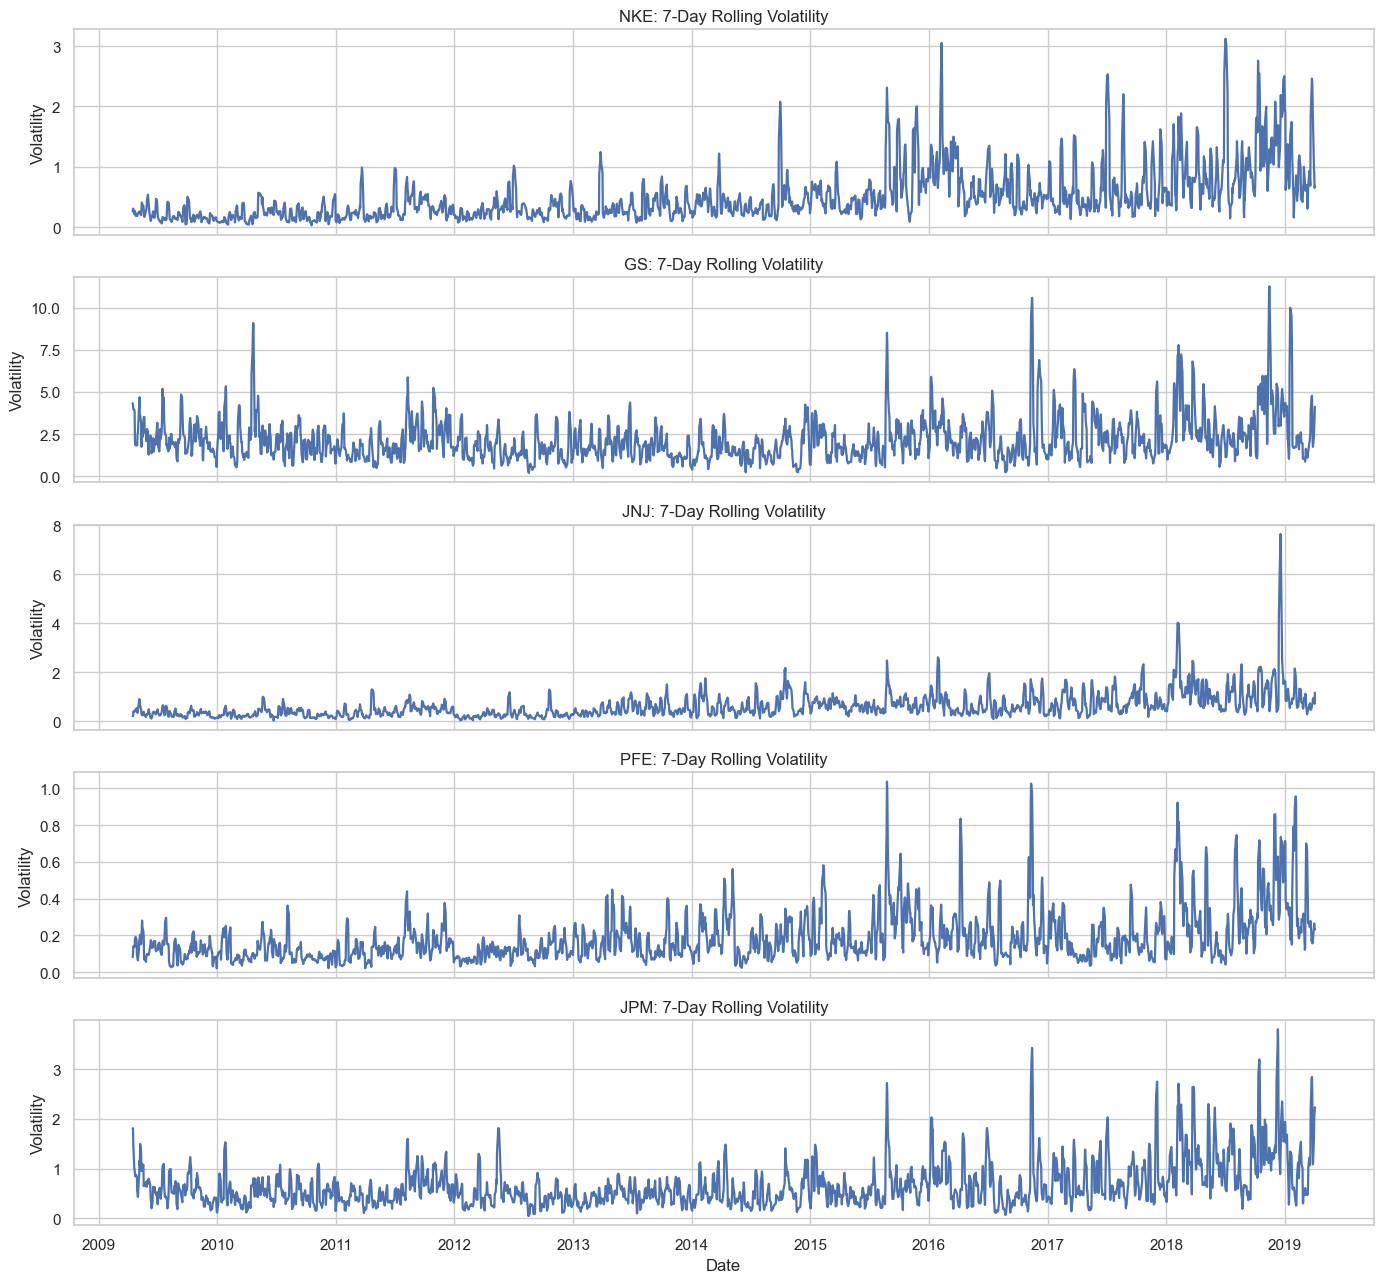

In [ ]:
tickers = list(dfs.keys())

n = len(tickers)
fig, axes = plt.subplots(n, 1, figsize=(14, 2.6 * n), sharex=True)

for i, t in enumerate(tickers):
    df = dfs[t]  

    sns.lineplot(
        data=df,
        x=df.index,
        y="7_DAY_STD",
        ax=axes[i],
        linewidth=1.6
    )

    axes[i].set_title(f"{t}: 7-Day Rolling Volatility")
    axes[i].set_ylabel("Volatility")

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

*Volatility is not constant over time and appears in distinct periods of low and high intensity. The plots clearly show volatility clustering, where calm periods are followed by extended phases of increased market turbulence. GS and JPM exhibit the largest volatility spikes, suggesting higher short-term risk compared to the other assets.*

### Price Dynamics and Technical Indicators

#### Trend Analysis Using Moving Averages

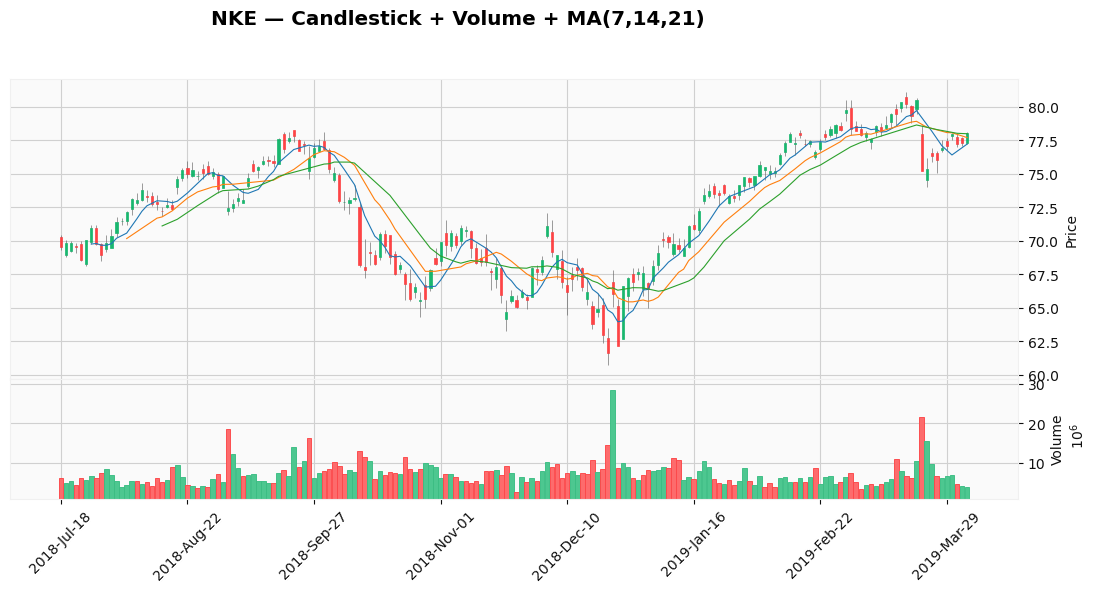

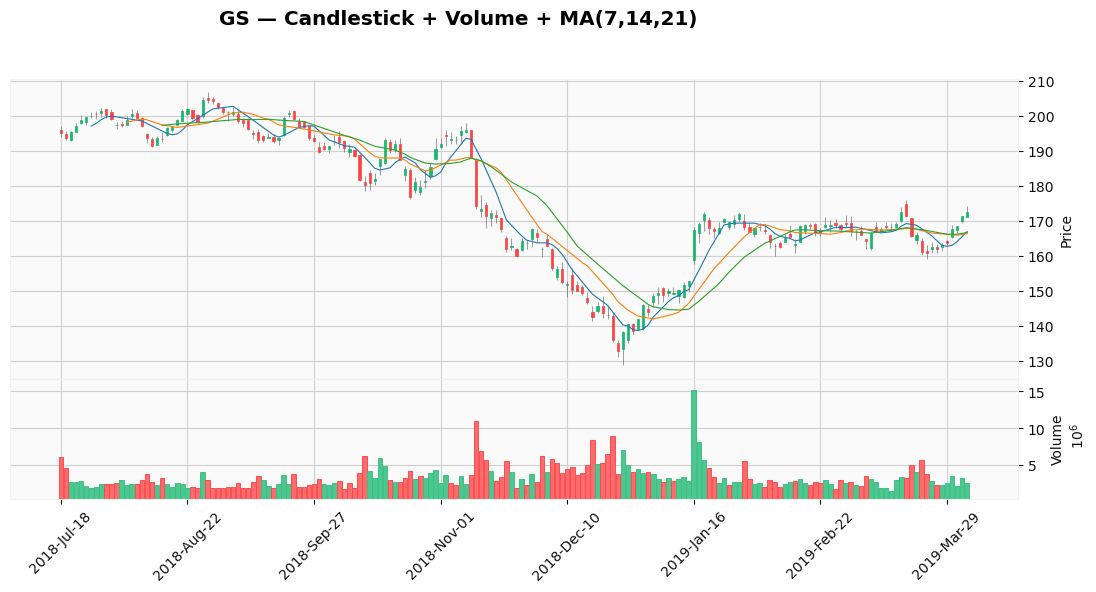

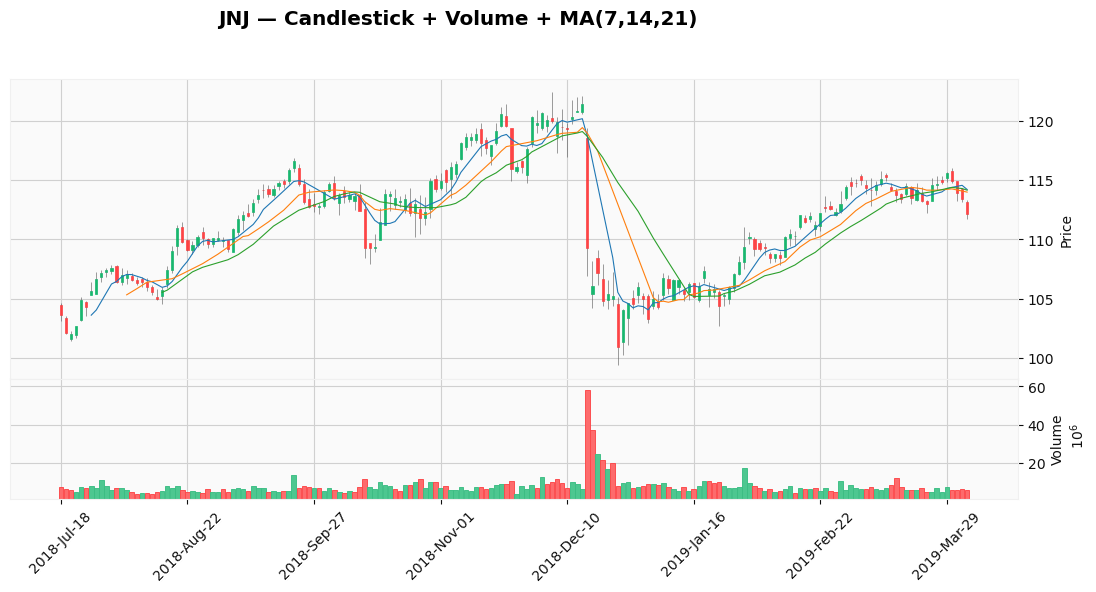

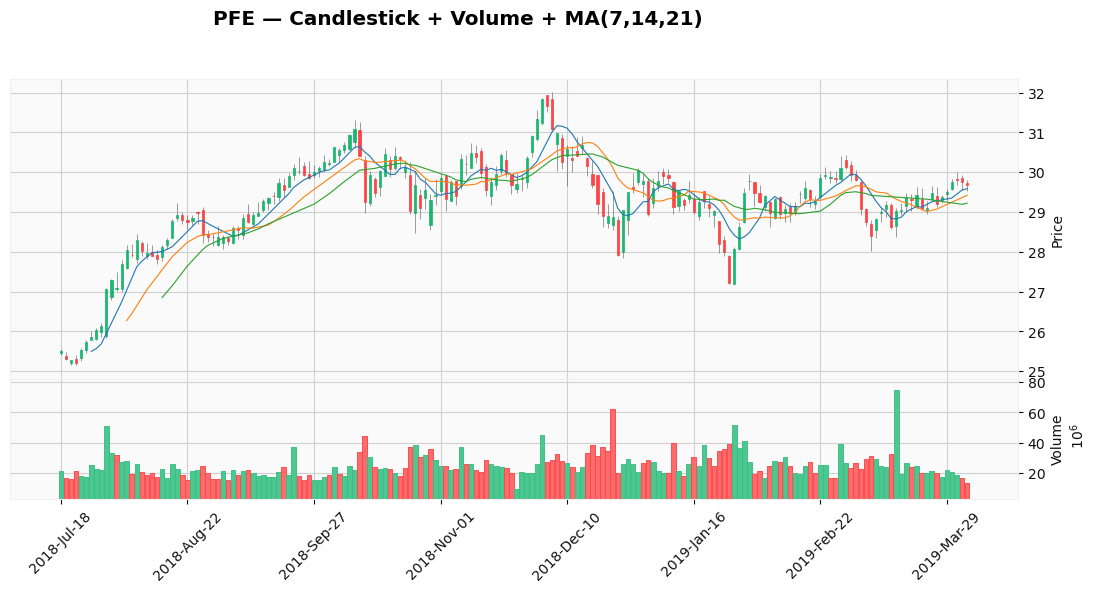

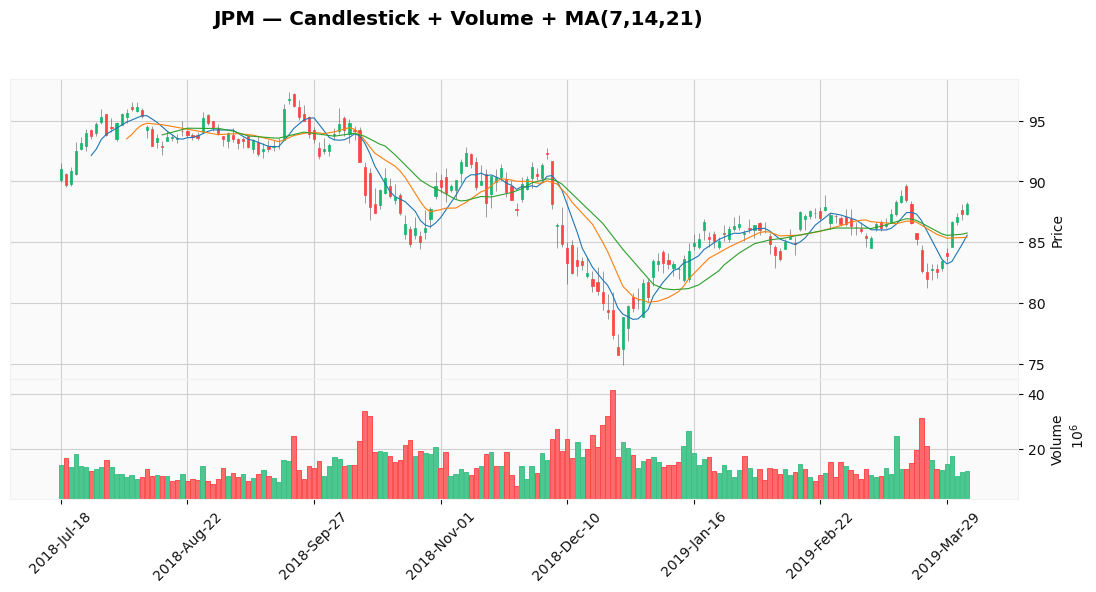

In [ ]:
def to_ohlc(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.set_index("Date")
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    return df[["Open","High","Low","Close","Volume"]]


last_n = 180  # ~ 9 months daily data

for t, df in dfs.items():
    ohlc = to_ohlc(df).tail(last_n)

    mpf.plot(
        ohlc,
        type="candle",
        volume=True,
        mav=(7, 14, 21),      
        style="yahoo",
        title=f"{t} — Candlestick + Volume + MA(7,14,21)",
        ylabel="Price",
        ylabel_lower="Volume",
        figsize=(14, 6)
    )


***NKE (Nike)***
*The plot shows a clear upward trend over the analyzed period, interrupted by short-term corrections. Moving averages (MA 7, 14, 21) effectively capture trend changes, with crossovers indicating temporary slowdowns or rebounds. Price movements are often accompanied by increased trading volume, suggesting stronger market participation.*

***GS (Goldman Sachs)***
*GS exhibits higher volatility with pronounced and abrupt price movements. Price declines are frequently associated with increased trading volume, indicating strong market reactions to news or events. Moving averages clearly reflect a shift from an upward to a downward trend, followed by a period of stabilization.*

***PFE (Pfizer)***
*PFE displays a relatively stable price pattern with lower volatility compared to other stocks. The moving averages remain close to each other, indicating weak trends and a predominance of sideways movements. Trading volume appears more evenly distributed, with fewer extreme spikes.*

***JPM (JPMorgan Chase)***
*JPM shows distinct medium-term trends and periods of heightened volatility, particularly during sharp price declines. Moving average crossovers effectively highlight market turning points. Elevated trading volume during downturns suggests increased investor uncertainty.*

***JNJ (Johnson & Johnson)***
*JNJ demonstrates relatively stable price growth, with a single notable episode of sharp decline accompanied by a spike in volume. Moving averages quickly adjust to this shock and subsequently indicate a gradual return to an upward trend. This behavior suggests a more defensive profile compared to financial sector stocks.*

#### Volatility Analysis Using Bollinger Bands

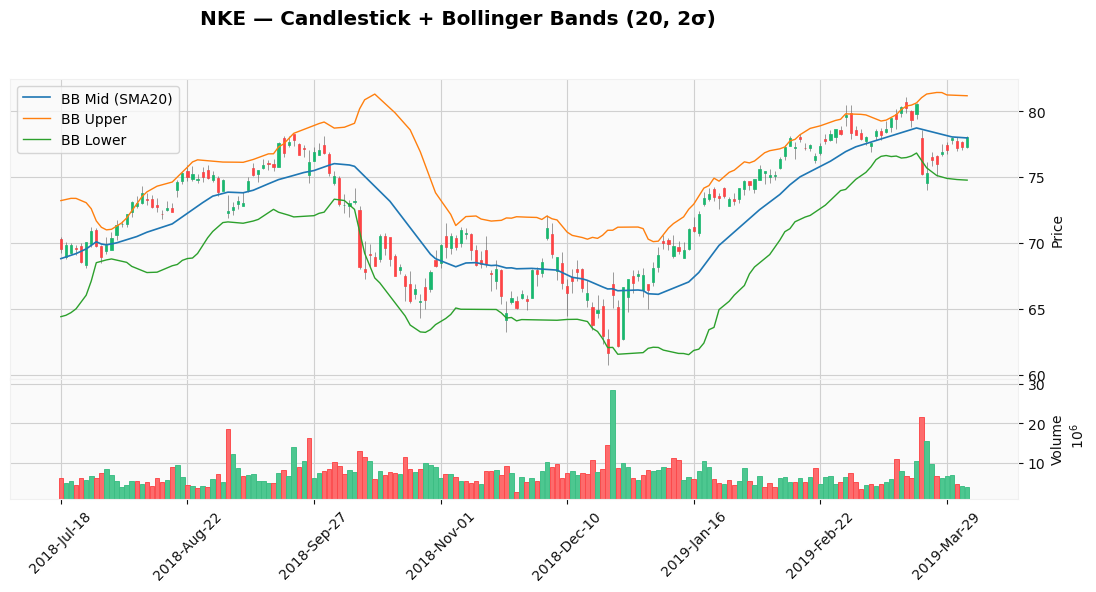

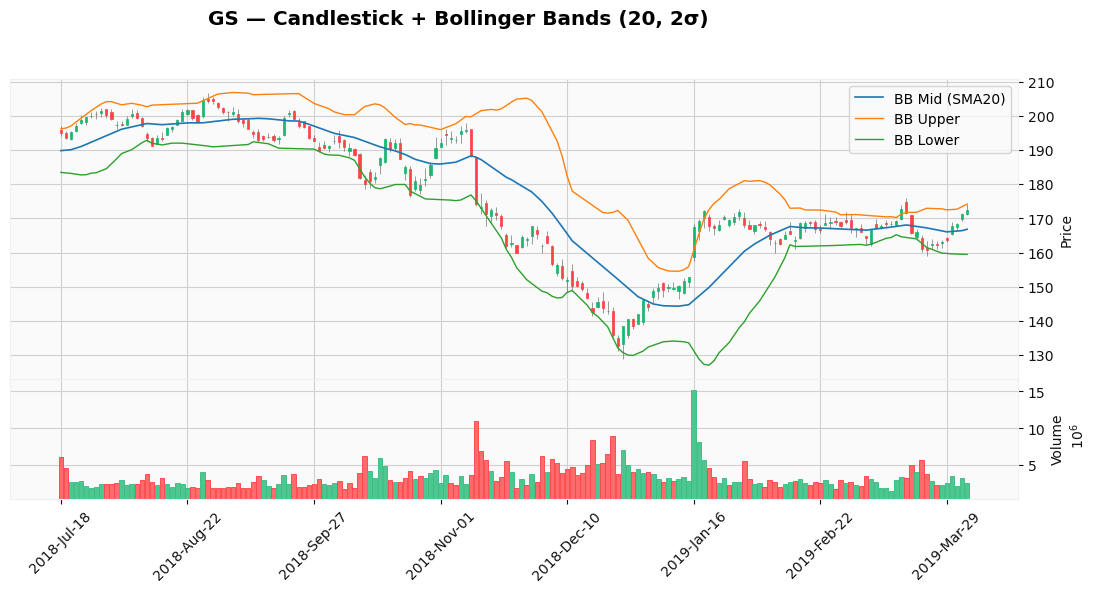

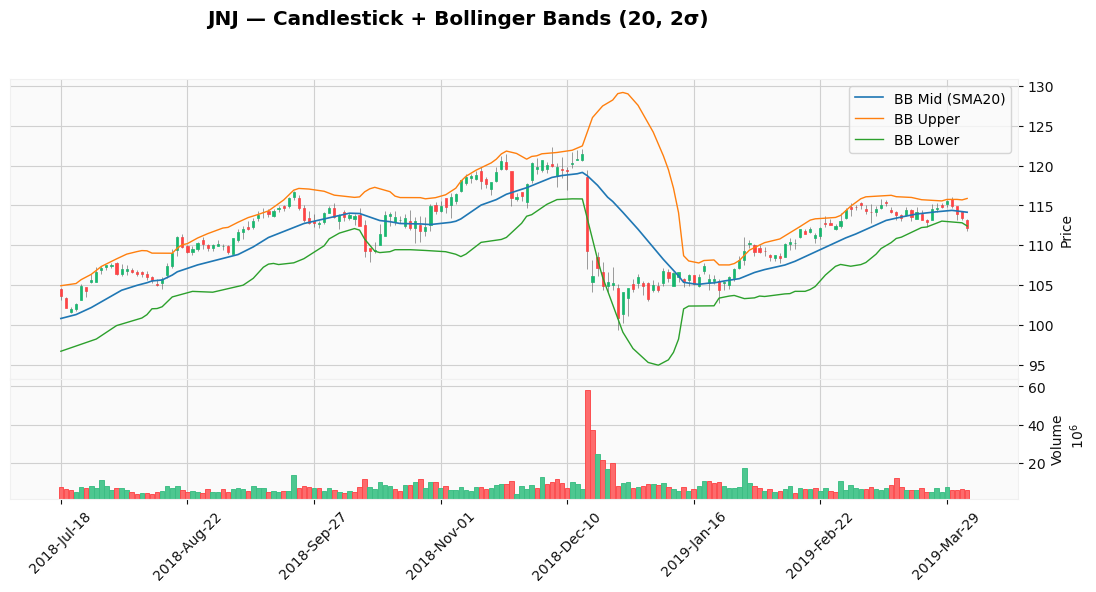

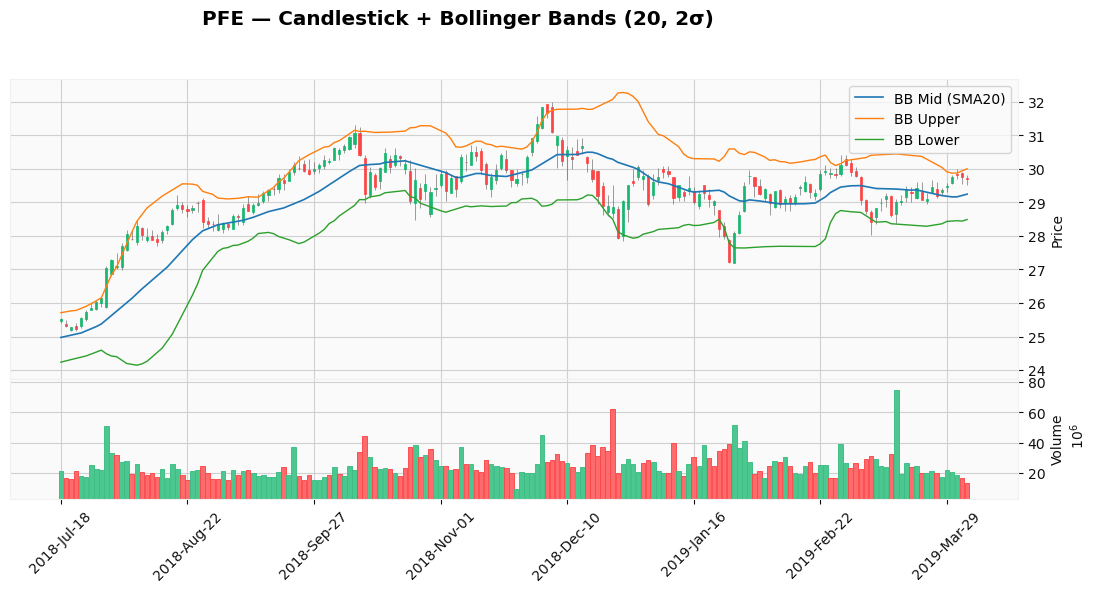

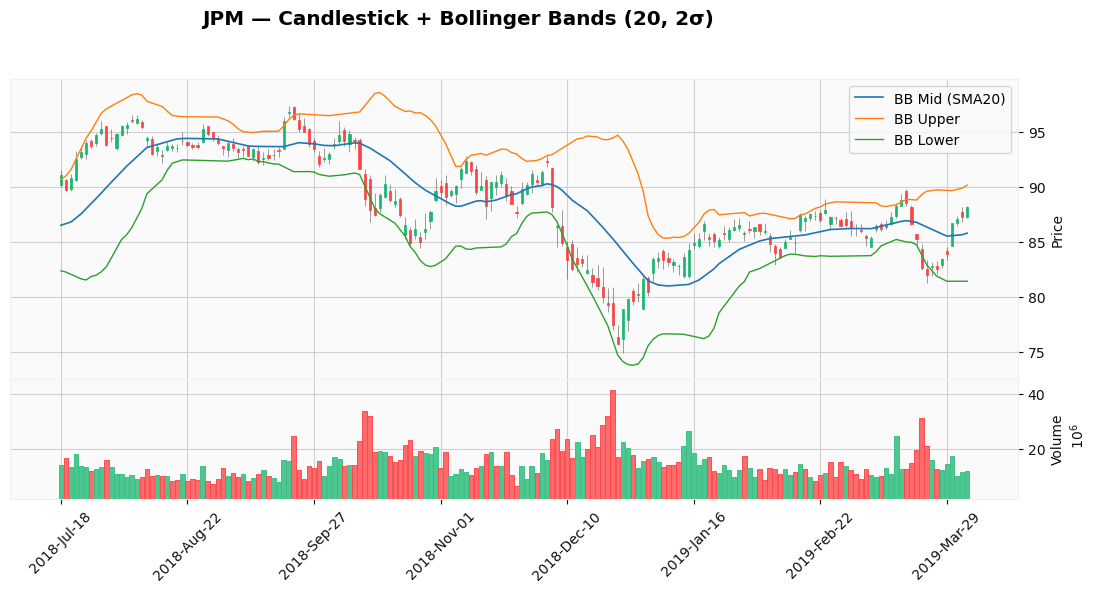

In [ ]:
#wstegi bollingera
def prepare_ohlc_with_bbands(df: pd.DataFrame, window: int = 20, num_std: float = 2.0) -> pd.DataFrame:
    df = df.copy()
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.set_index("Date")
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    ohlc = df[["Open", "High", "Low", "Close", "Volume"]].copy()
    sma = ohlc["Close"].rolling(window).mean()
    std = ohlc["Close"].rolling(window).std()

    ohlc["BB_MID"] = sma
    ohlc["BB_UP"] = sma + num_std * std
    ohlc["BB_LOW"] = sma - num_std * std
    return ohlc

last_n = 180  # last 9 months daily data

for t, df in dfs.items():
    ohlc = prepare_ohlc_with_bbands(df, window=20, num_std=2.0).tail(last_n)

    apds = [
        mpf.make_addplot(ohlc["BB_MID"], label="BB Mid (SMA20)", width=1.2),
        mpf.make_addplot(ohlc["BB_UP"],  label="BB Upper", width=1.0),
        mpf.make_addplot(ohlc["BB_LOW"], label="BB Lower", width=1.0),
    ]

    mpf.plot(
        ohlc[["Open","High","Low","Close","Volume"]],
        type="candle",
        volume=True,
        addplot=apds,
        style="yahoo",
        title=f"{t} — Candlestick + Bollinger Bands (20, 2σ)",
        ylabel="Price",
        ylabel_lower="Volume",
        figsize=(14, 6),
    )


***NKE (Nike)***
*NKE prices remain within the Bollinger Bands for most of the period, indicating moderate volatility. Touches of the lower band often occur during price corrections and are followed by a reversion toward the middle band (BB Mid). Band contractions and expansions clearly reflect changing volatility regimes.*

***GS (Goldman Sachs)***
*GS exhibits wide Bollinger Bands, signaling high price volatility. During strong downturns, prices frequently stay close to the lower band, while band expansions indicate increased market uncertainty. This behavior is typical for financial sector stocks.*

***JNJ (Johnson & Johnson)***
*JNJ shows relatively narrow Bollinger Bands throughout most of the period, suggesting lower volatility. A single sharp decline is accompanied by a sudden band expansion, followed by gradual price stabilization. This pattern reflects the defensive nature of the stock.*

***PFE (Pfizer)***
*Bollinger Bands for PFE remain relatively stable and rarely expand significantly. Prices tend to oscillate around the middle band, indicating weak trends and predominantly sideways movements. Overall volatility is lower compared to financial stocks.*

***JPM (JPMorgan Chase)***
*JPM displays clear periods of Bollinger Band expansion, particularly during sharp price declines. Prices often test the lower band during market stress and later revert toward the mean, indicating volatility clustering.*

### Sharpe ratio

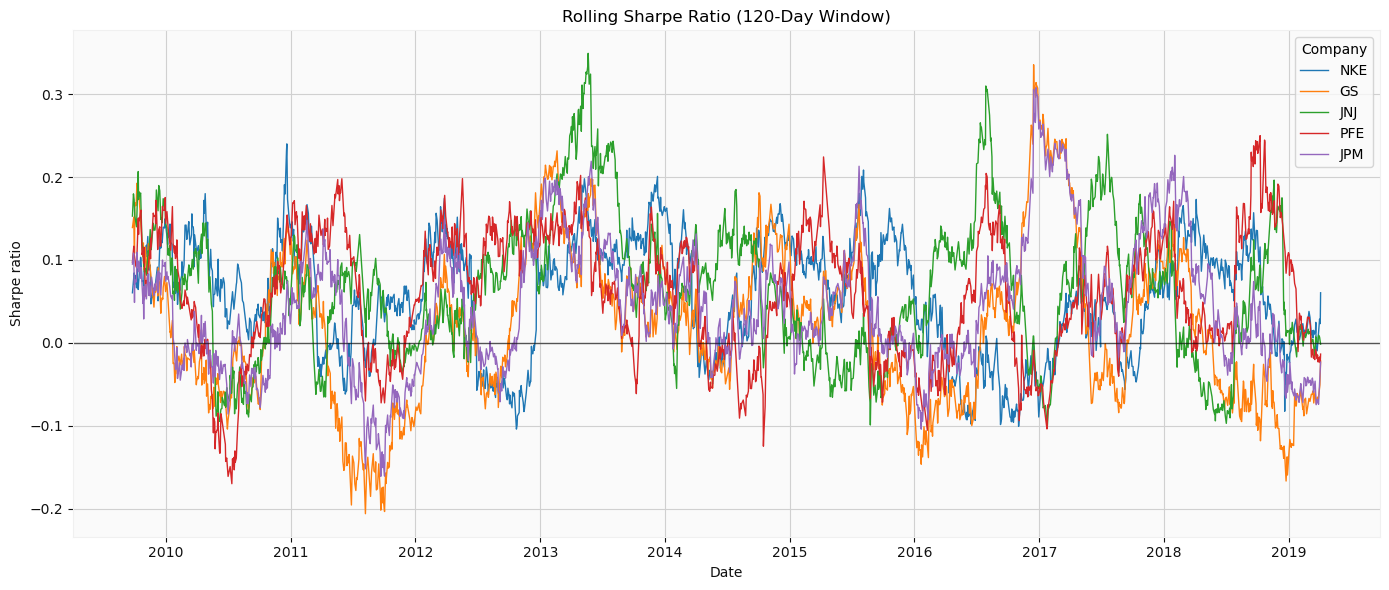

In [ ]:
rolling_window = 120 # 6 months daily data

rolling_sharpe = (
    log_returns.rolling(rolling_window).mean() /
    log_returns.rolling(rolling_window).std()
)

plt.figure(figsize=(14, 6))

for ticker in rolling_sharpe.columns:
    sns.lineplot(
        data=rolling_sharpe,
        x=rolling_sharpe.index,
        y=ticker,
        label=ticker,
        linewidth=1
    )

plt.title("Rolling Sharpe Ratio (120-Day Window)", fontsize=12)
plt.xlabel("Date")
plt.ylabel("Sharpe ratio")
plt.axhline(0, color="black", linewidth=1, alpha=0.6)
plt.legend(title="Company")
plt.tight_layout()
plt.show()

*The Sharpe ratio indicates whether holding a stock was worthwhile when accounting for both return and risk.*

*It reflects:*
- *how much return an investor could earn,*
- *and how risky the price movements were.*

*In general, higher values are preferred —*
- *above zero indicates positive risk-adjusted performance,*
- *while values below zero suggest that the risk was not adequately compensated.*

*What can be observed in the chart:*
- *NKE — mostly above zero, indicating that investing in Nike was generally worth the risk.*
- *GS — frequently below zero, suggesting high risk without sufficient reward during many periods.*
- *JNJ — the most stable stock, with mostly positive and smooth values, pointing to a calmer investment profile.*
- *PFE — values close to zero, indicating average performance without a clear advantage.*
- *JPM — strong fluctuations, meaning periods of high profitability but also elevated risk.*

### Correlation analysis

#### Correlation between companies

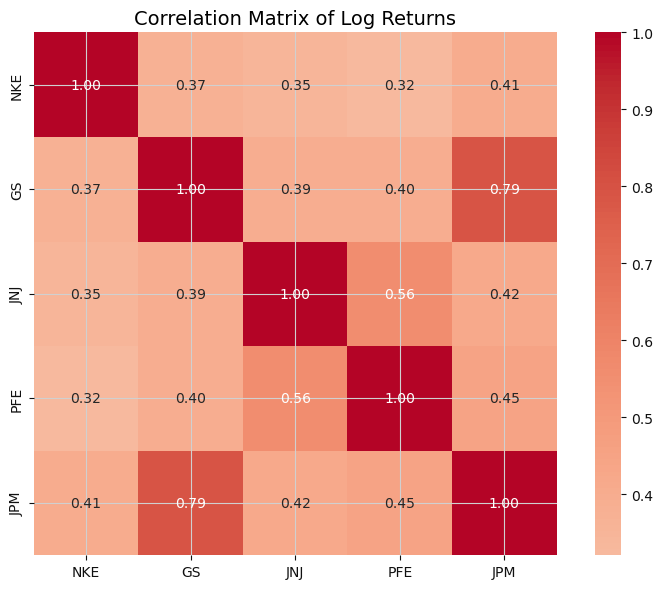

In [ ]:
corr_returns = log_returns.corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_returns,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)

plt.title("Correlation Matrix of Log Returns", fontsize=14)
plt.tight_layout()
plt.show()

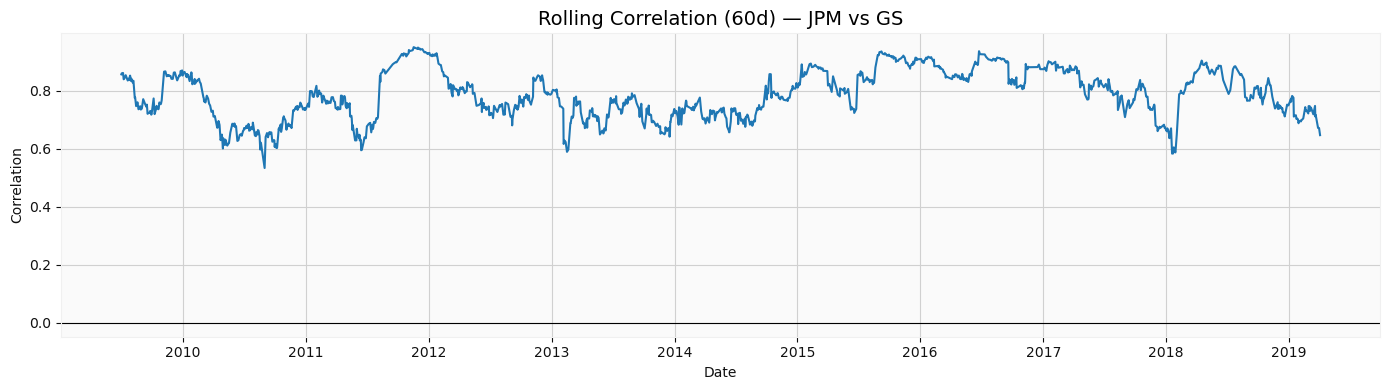

In [23]:
pair = ("JPM", "GS")

rolling_corr = (
    log_returns[pair[0]]
    .rolling(60)
    .corr(log_returns[pair[1]])
)

plt.figure(figsize=(14, 4))
sns.lineplot(x=rolling_corr.index, y=rolling_corr.values)

plt.title(f"Rolling Correlation (60d) — {pair[0]} vs {pair[1]}", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.axhline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

- *GS and JPM exhibit a very high correlation (~0.79), indicating that they move very similarly — when one stock rises or falls, the other typically follows the same direction.*
- *Most other stock pairs show moderate correlations (approximately 0.3–0.5), suggesting occasional co-movement but without a strong relationship.*
- *No negatively correlated stock pairs are observed, meaning none of the analyzed stocks consistently move in opposite directions.*
- *The lowest correlation is found between NKE and PFE (around 0.32), indicating the most independent price behavior among the companies.*
- *Stocks from different sectors (e.g., NKE — consumer goods and PFE — pharmaceuticals) tend to be less correlated, which is typical and advantageous from a portfolio diversification perspective.*


#### Correlation between variables

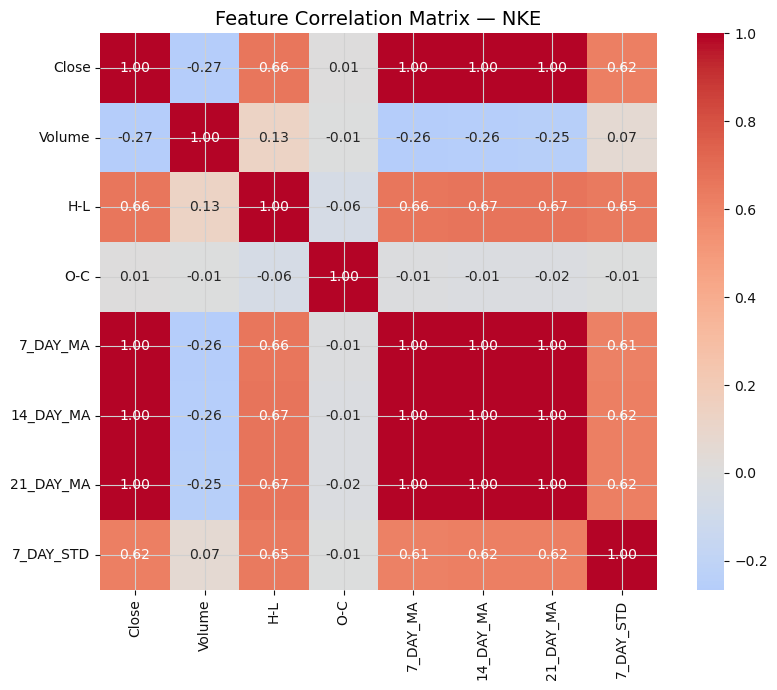

In [24]:
ticker = "NKE"  # wybierz 1 reprezentatywną spółkę
df = dfs[ticker].copy()

features = [
    "Close", "Volume", "H-L", "O-C",
    "7_DAY_MA", "14_DAY_MA", "21_DAY_MA",
    "7_DAY_STD"
]

corr_features = df[features].corr(method="pearson")

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_features,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)

plt.title(f"Feature Correlation Matrix — {ticker}", fontsize=14)
plt.tight_layout()
plt.show()


- *The closing price (Close) is strongly correlated with the 7-, 14-, and 21-day moving averages, which is expected as these indicators are directly derived from the price.*
- *The H–L (High–Low) variable shows a moderate positive correlation with both the price and moving averages, indicating that larger daily price ranges tend to occur at higher price levels.*
- *Trading volume exhibits weak to moderate correlations with other variables, suggesting the absence of a simple linear relationship with price movements.*
- *The O–C (Open–Close) feature shows very low correlations with most variables, pointing to a more random day-to-day behavior.*
- *The 7-day rolling standard deviation (7_DAY_STD) is positively correlated with volatility-related features, confirming that it effectively captures changes in price variability.*
- *High correlations among some features are expected, as many of them are constructed using the same underlying price information.*

*It is important to note that this matrix captures only linear relationships. The primary objective of the subsequent analysis is to identify nonlinear dependencies using machine learning models; therefore, the presence of linear correlations at this stage is both acceptable and expected.*